## 05 Plotter

This notebook explains each function in the plotter module. These functions produce VAPOR  output images.

In [1]:
# import modules
import convenience as con
import support as sup
import core as cor
import plotter as plo
import numpy as np

from IPython.display import Image, display
from astropy.constants import au

# Point to test data, and create list of total brightness and polarized brightness image pair
tb_base_fits="./test_data/stereo/20121109_000915_B_base.fts"
pb_base_fits="./test_data/stereo/20121109_000915_pB_base.fts"

tb_fits="./test_data/stereo/20121109_030915_B.fts"
pb_fits="./test_data/stereo/20121109_030915_pB.fts"

base_fits_file_list=[tb_base_fits, pb_base_fits]
fits_file_list=[tb_fits, pb_fits]

### Function create_figure
This function accepts a list of total and polarized brightness FITS, and optionally matching base images and generates a distance map as a .png file

In [2]:
plo.create_figure(fits_file_list, subtract_base_image = True, base_file_list = base_fits_file_list, image_name = "test_plotter")

### Function: create_triple_stereo_plot
This function creates a rdial output plot with 3 different points of view

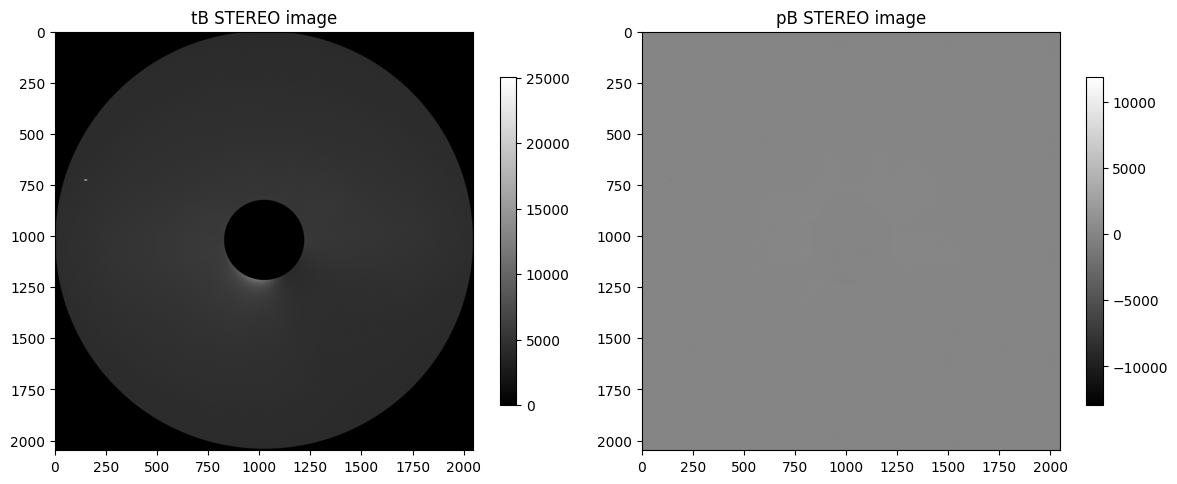

In [3]:
# import some data using import_data (see doc_03_support)
tb_data, pB_data, tb_header, pb_header = sup.import_data(fits_file_list)

# view tB, pB pair, both have been masked by default (see doc_02_convenience)
con.show_2_images(tb_data, pB_data,  title1="tB STEREO image", title2="pB STEREO image")

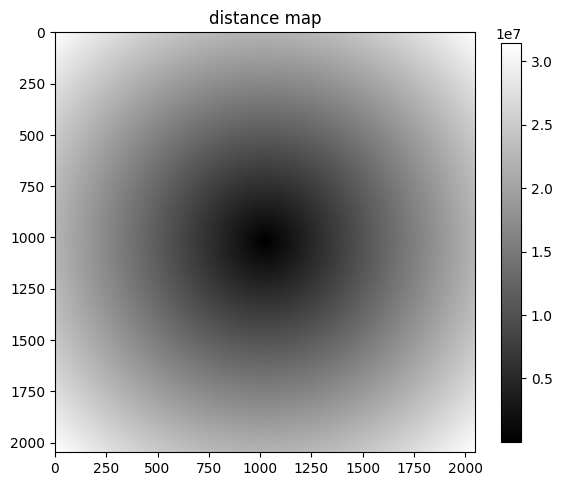

In [4]:
# create a distance map using the above stereo data (see doc_03_support)
distance_map = sup.create_distance_map(fits_file_list)

# view distance map, each pixel has its distance from the sun center (see doc_02_convenience)
con.show_1_image(distance_map,  title1="distance map")

In [5]:
# define distance to observer, assuming L1
dist_in_km=con.to_km(1, unit="L1")
print("L1 = ", dist_in_km, "km" )

L1 =  148097870.70000002 km


In [6]:
# create a positive solution
plo.create_triple_stereo_plot(tb_data, pB_data, distance_map, dist_in_km, solution = "plus")

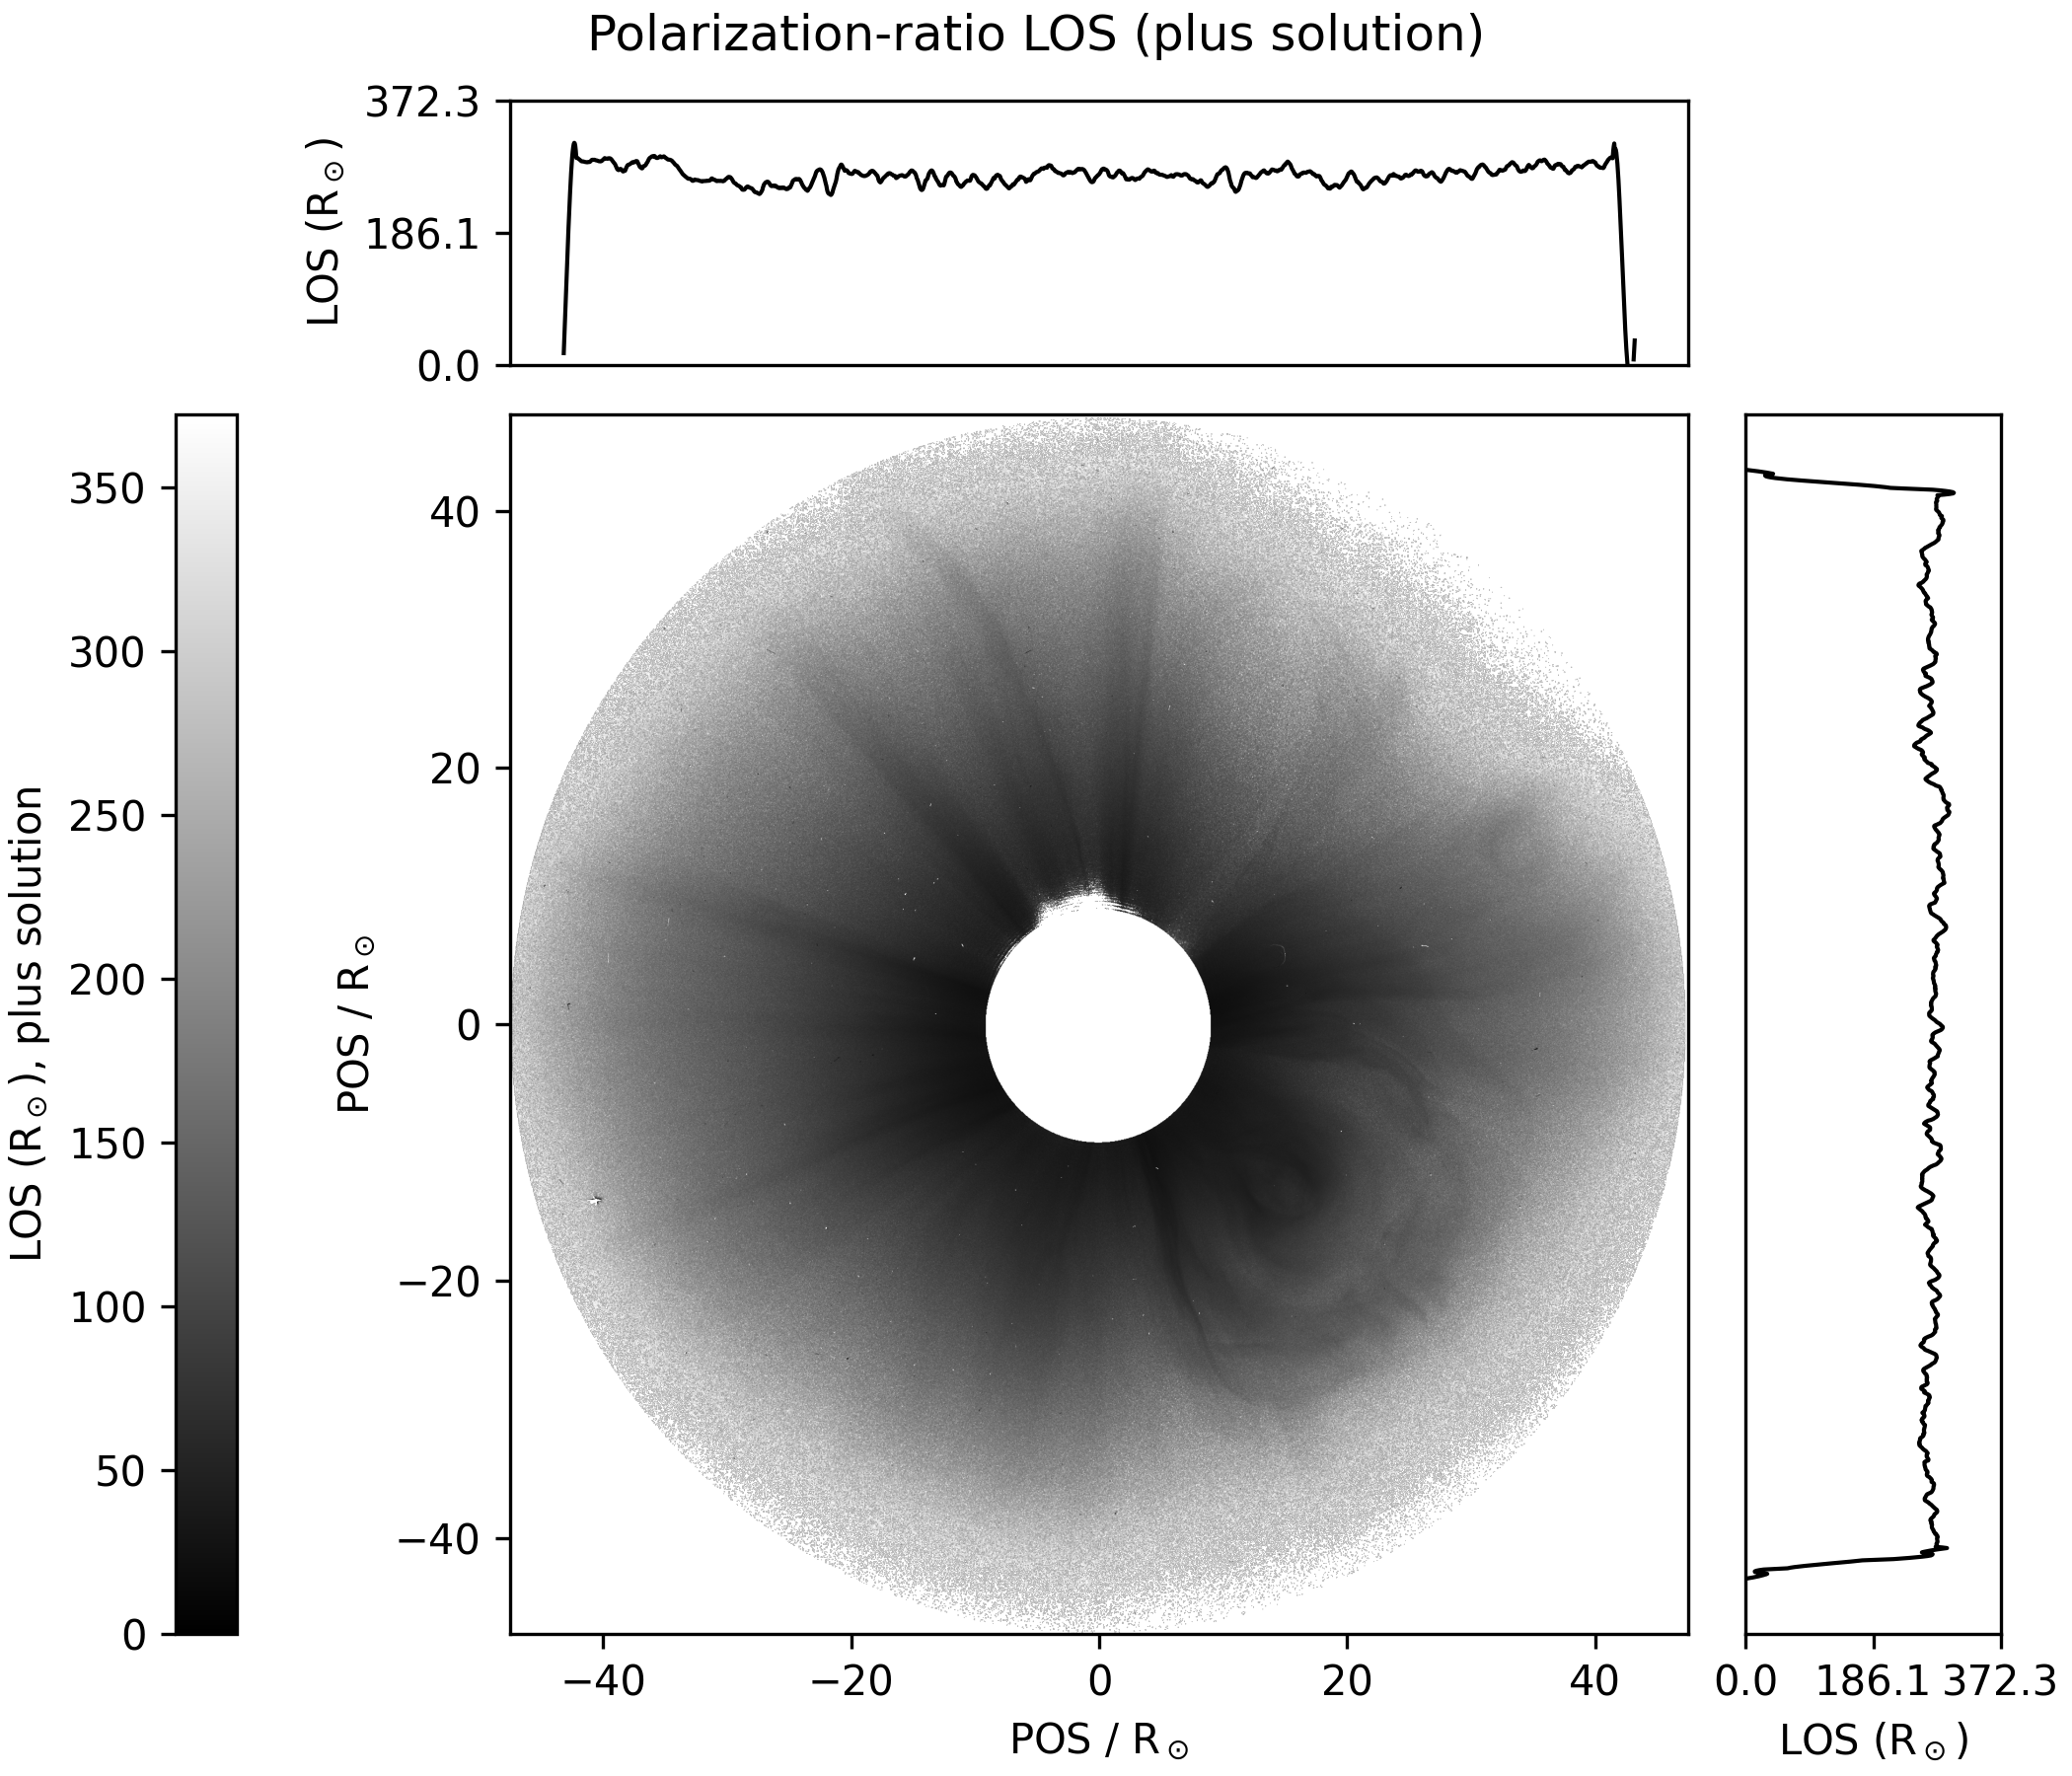

In [7]:
# display the image
display(Image(filename="triple_plot_plus.png"))

In [8]:
# create a negative solution
plo.create_triple_stereo_plot(tb_data, pB_data, distance_map, dist_in_km, solution = "minus")

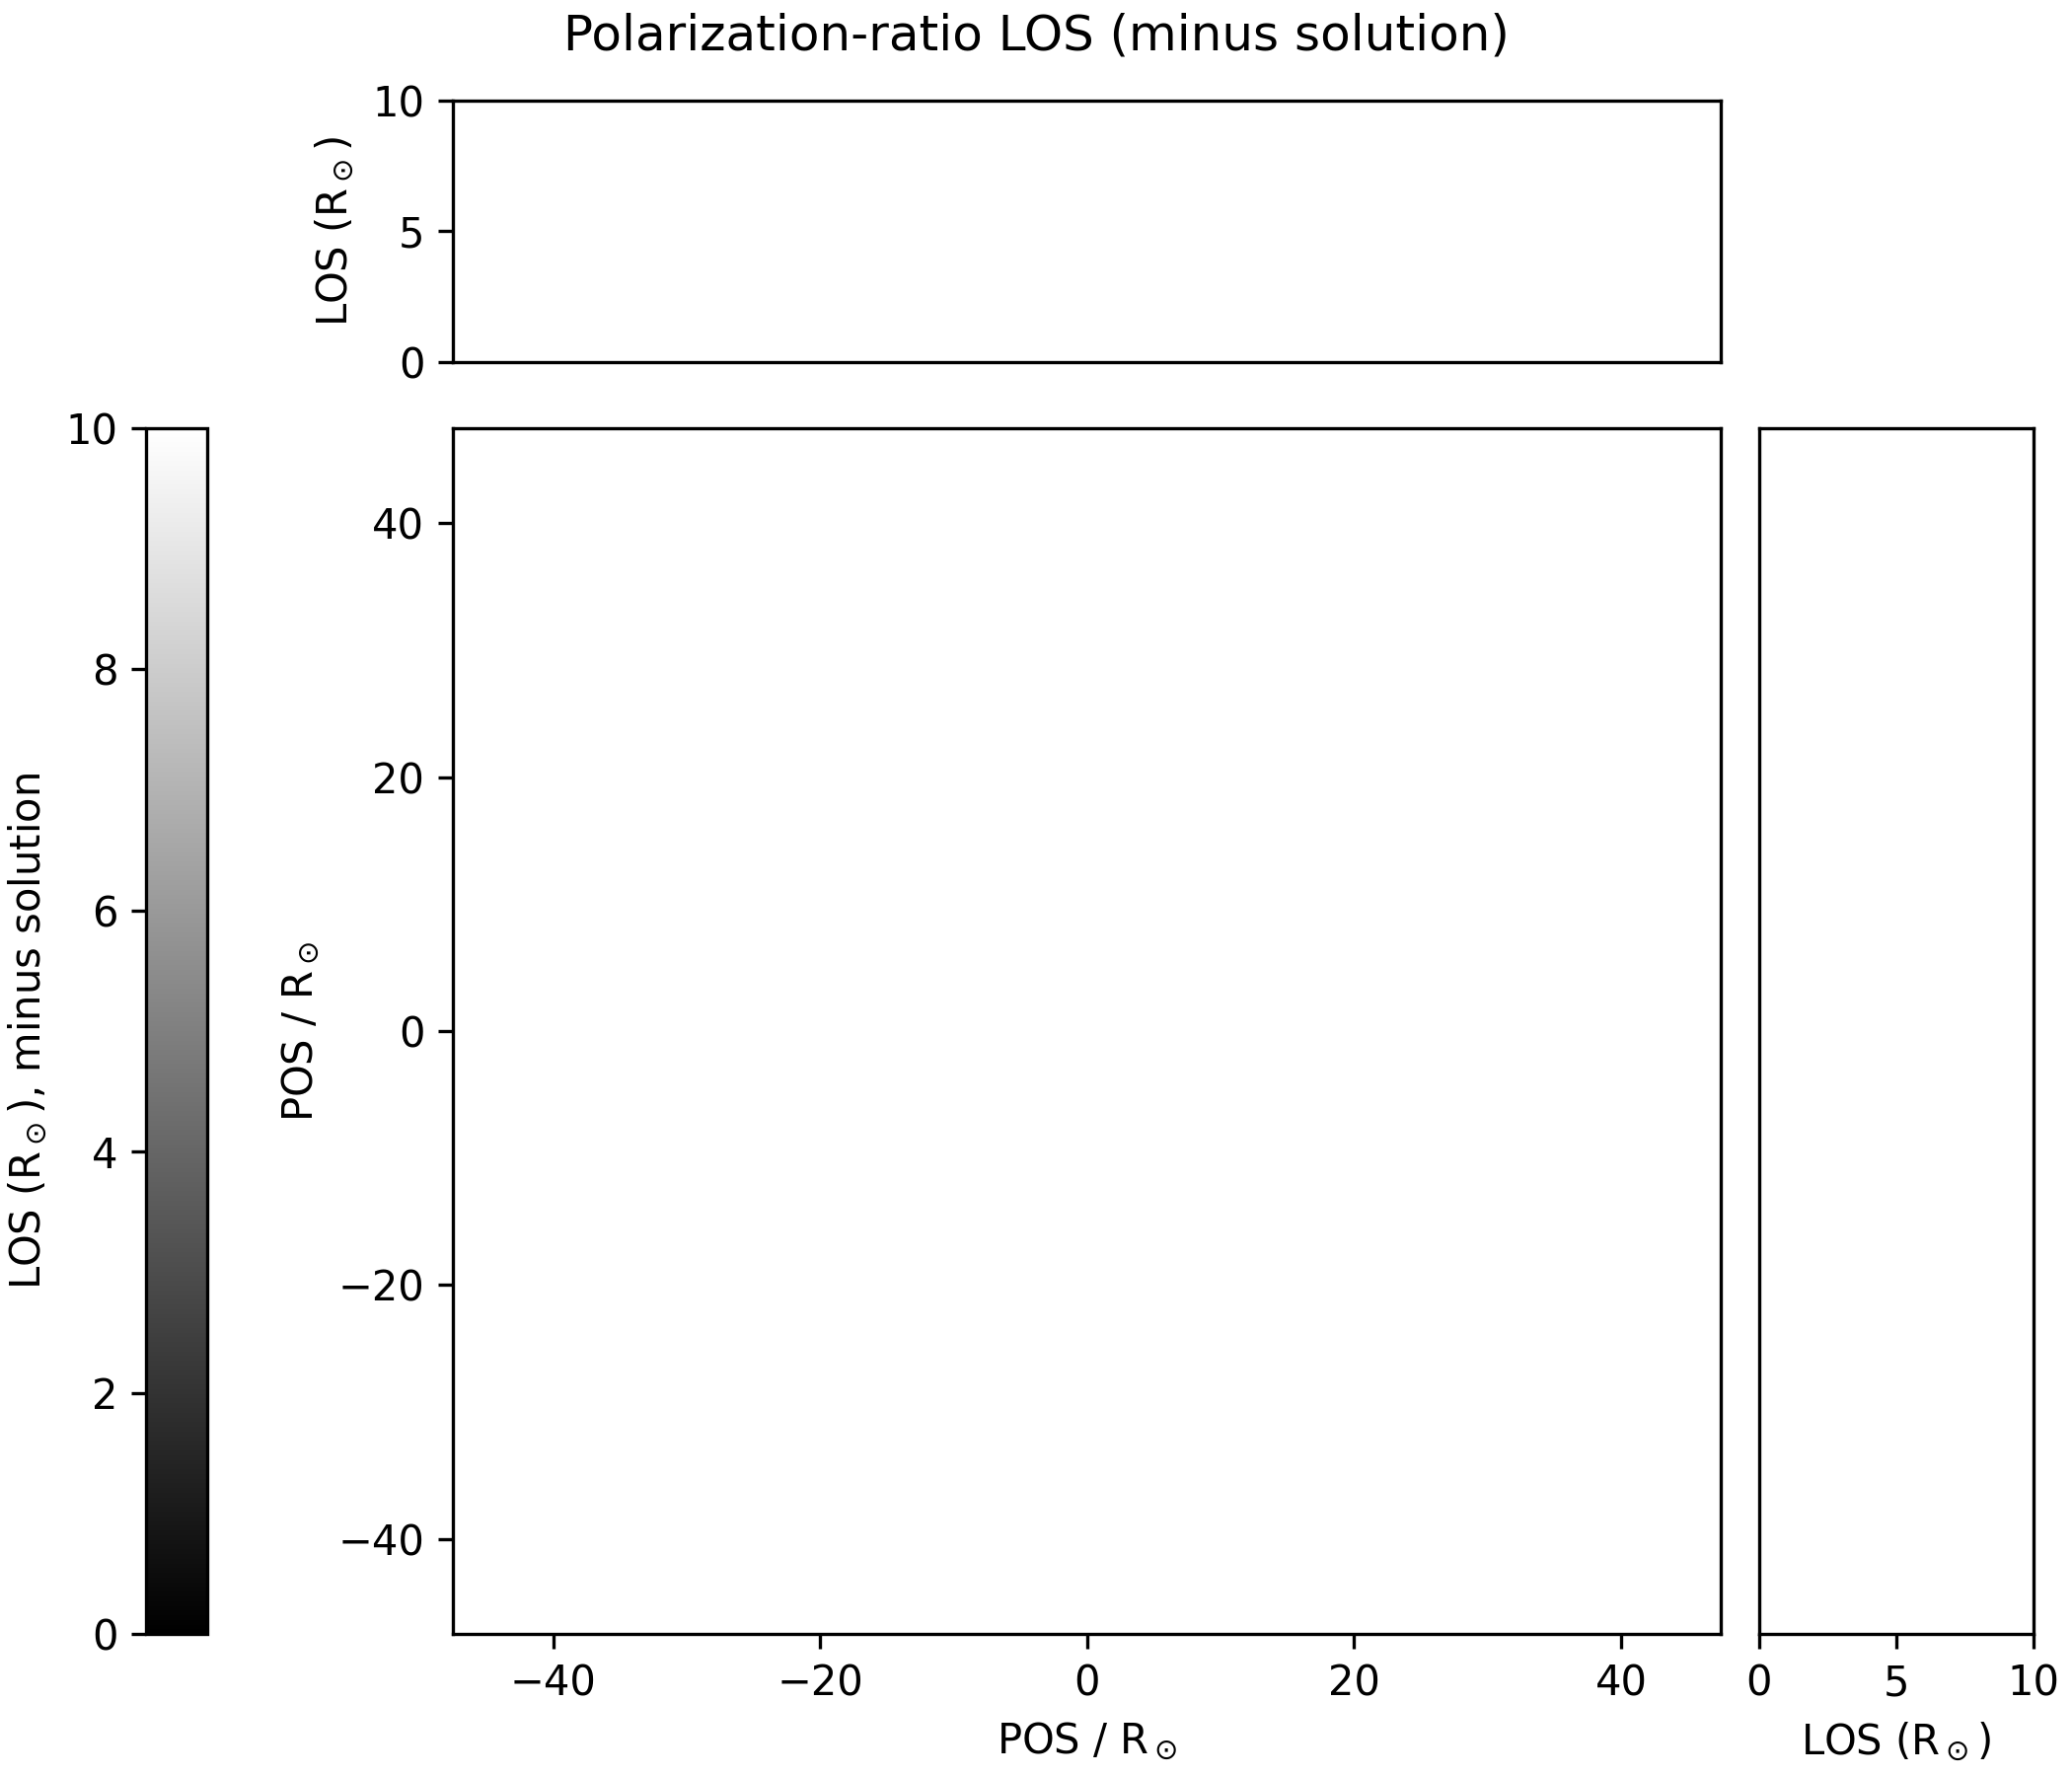

In [9]:
# display the image
display(Image(filename="triple_plot_minus.png"))